In [26]:
# VesterAI - Notebook 09: Dashboard & Visualization

"""
Objective:
Visualize stock, sentiment, and technical indicators to analyze market behavior and LLM impact.

Visual Sections:
1. Stock Price & Sentiment Overlay
2. Sentiment Trends (Twitter, News, Reddit)
3. Technical Indicators (RSI, MACD, OBV)
4. Predicted vs Actual Movement (optional)
"""

'\nObjective:\nVisualize stock, sentiment, and technical indicators to analyze market behavior and LLM impact.\n\nVisual Sections:\n1. Stock Price & Sentiment Overlay\n2. Sentiment Trends (Twitter, News, Reddit)\n3. Technical Indicators (RSI, MACD, OBV)\n4. Predicted vs Actual Movement (optional)\n'

In [27]:
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Optional for interactivity
import plotly.express as px
import plotly.graph_objects as go

sns.set(style="whitegrid")

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# Load processed model-ready data
data_path = "../data/processed/AAPL_model_data.csv"
df = pd.read_csv(data_path, parse_dates=["Date"])

# Sort for time-based plots
df = df.sort_values("Date").reset_index(drop=True)
df.head()

,Date,Close,High,Low,Open,Volume,twitter_sentiment,news_sentiment,reddit_sentiment,return,...,rolling_vol_3,rsi_14,macd,macd_signal,ema_12,ema_26,bollinger_h,bollinger_l,bollinger_m,obv
0,2020-02-25,69.910980,73.417696,69.437761,73.034266,230673600,0.0,0.0,0.0,-0.033872,...,0.012452,30.770217,-0.372241,0.561673,75.747832,76.120073,81.620885,72.334281,76.977583,-82898400
1,2020-02-26,71.020020,72.289234,69.527545,69.534825,198054800,0.0,0.0,0.0,0.015864,...,0.033353,35.233280,-0.721815,0.304976,75.020477,75.742291,82.003643,71.362111,76.682877,115156400
2,2020-02-27,66.377571,69.406208,66.241671,68.217082,320605600,0.0,0.0,0.0,-0.065368,...,0.040956,27.299508,-1.357810,-0.027581,73.690799,75.048608,82.960093,69.191003,76.075548,-205449200
3,2020-02-28,66.338745,67.564279,62.215630,62.431618,426510000,0.0,0.0,0.0,-0.000585,...,0.042946,27.244254,-1.843720,-0.390809,72.559714,74.403433,83.460116,67.483818,75.471967,-631959200
4,2020-03-02,72.514908,73.153155,67.396809,68.503424,341397200,0.0,0.0,0.0,0.093100,...,0.079672,45.975879,-1.710722,-0.654792,72.552820,74.263543,83.440705,67.261347,75.351026,-290562000


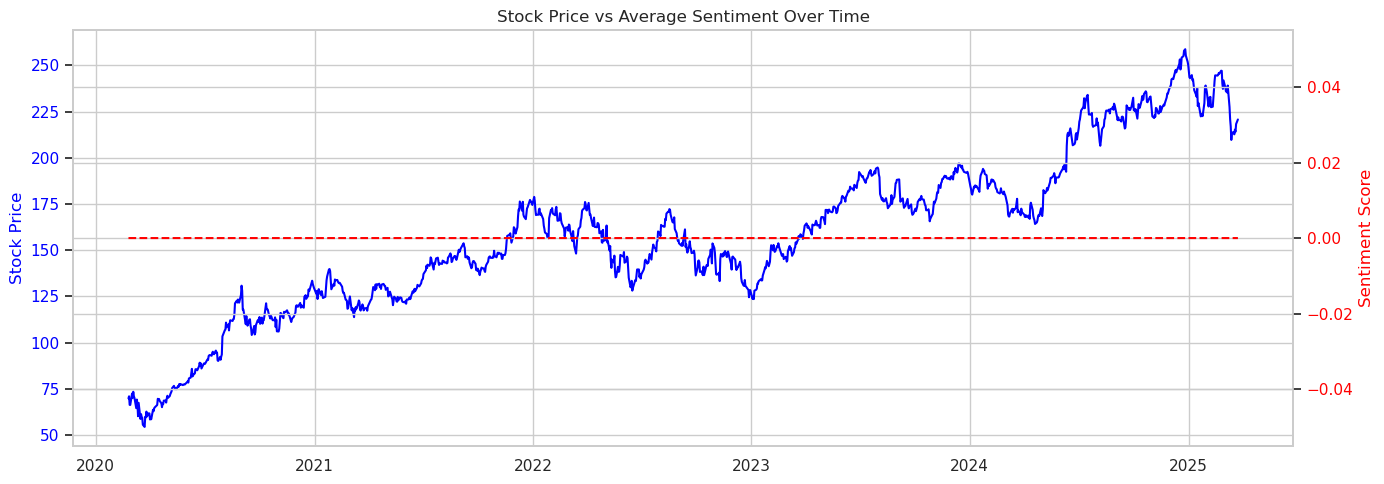

In [29]:
# Ensure Date column is a flat Series
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

# Average sentiment
avg_sentiment = (df["twitter_sentiment"].fillna(0) + df["news_sentiment"].fillna(0)) / 2

# Plot
fig, ax1 = plt.subplots(figsize=(14, 5))

# Stock Close
ax1.plot(df["Date"].values, df["Close"].values, label="Stock Close", color="blue")
ax1.set_ylabel("Stock Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Sentiment Overlay
ax2 = ax1.twinx()
ax2.plot(df["Date"].values, avg_sentiment.values, label="Avg Sentiment", color="red", linestyle="--")
ax2.set_ylabel("Sentiment Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Stock Price vs Average Sentiment Over Time")
fig.tight_layout()
plt.show()

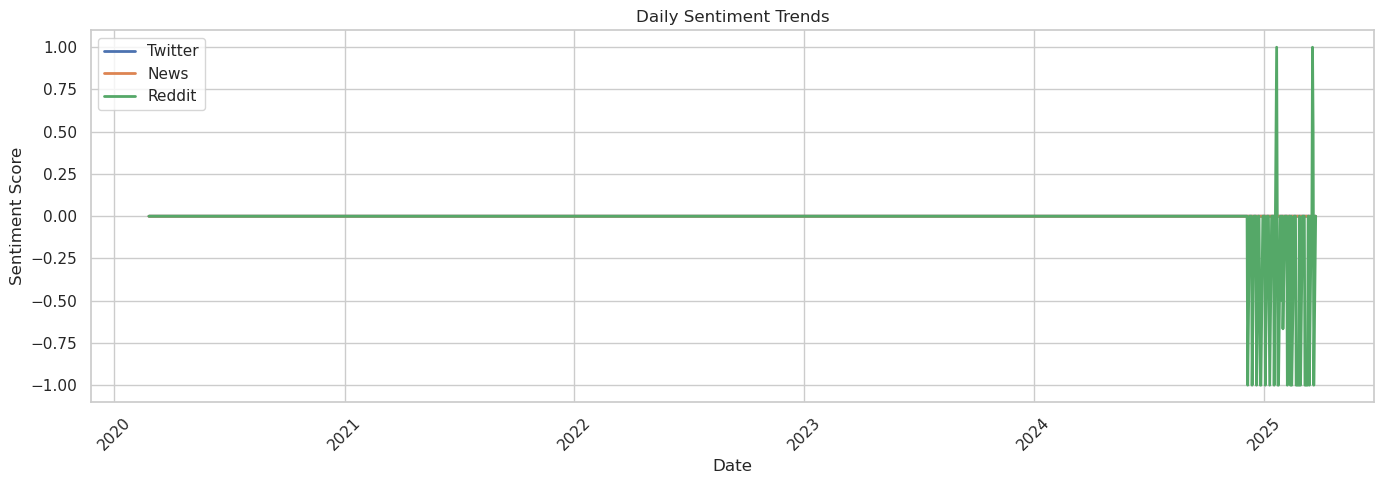

In [30]:
plt.figure(figsize=(14, 5))
sns.lineplot(x="Date", y="twitter_sentiment", data=df, label="Twitter", linewidth=2)
sns.lineplot(x="Date", y="news_sentiment", data=df, label="News", linewidth=2)
if "reddit_sentiment" in df.columns:
    sns.lineplot(x="Date", y="reddit_sentiment", data=df, label="Reddit", linewidth=2)

plt.title("Daily Sentiment Trends")
plt.ylabel("Sentiment Score")
plt.xlabel("Date")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Check if indicators are clean and numeric
for col in ["rsi_14", "macd", "macd_signal", "obv"]:
    print(f"{col} → dtype: {df[col].dtype}, has NaN: {df[col].isna().sum()}, shape: {df[col].shape}")

rsi_14 → dtype: float64, has NaN: 0, shape: (1277,)
macd → dtype: float64, has NaN: 0, shape: (1277,)
macd_signal → dtype: float64, has NaN: 0, shape: (1277,)
obv → dtype: int64, has NaN: 0, shape: (1277,)


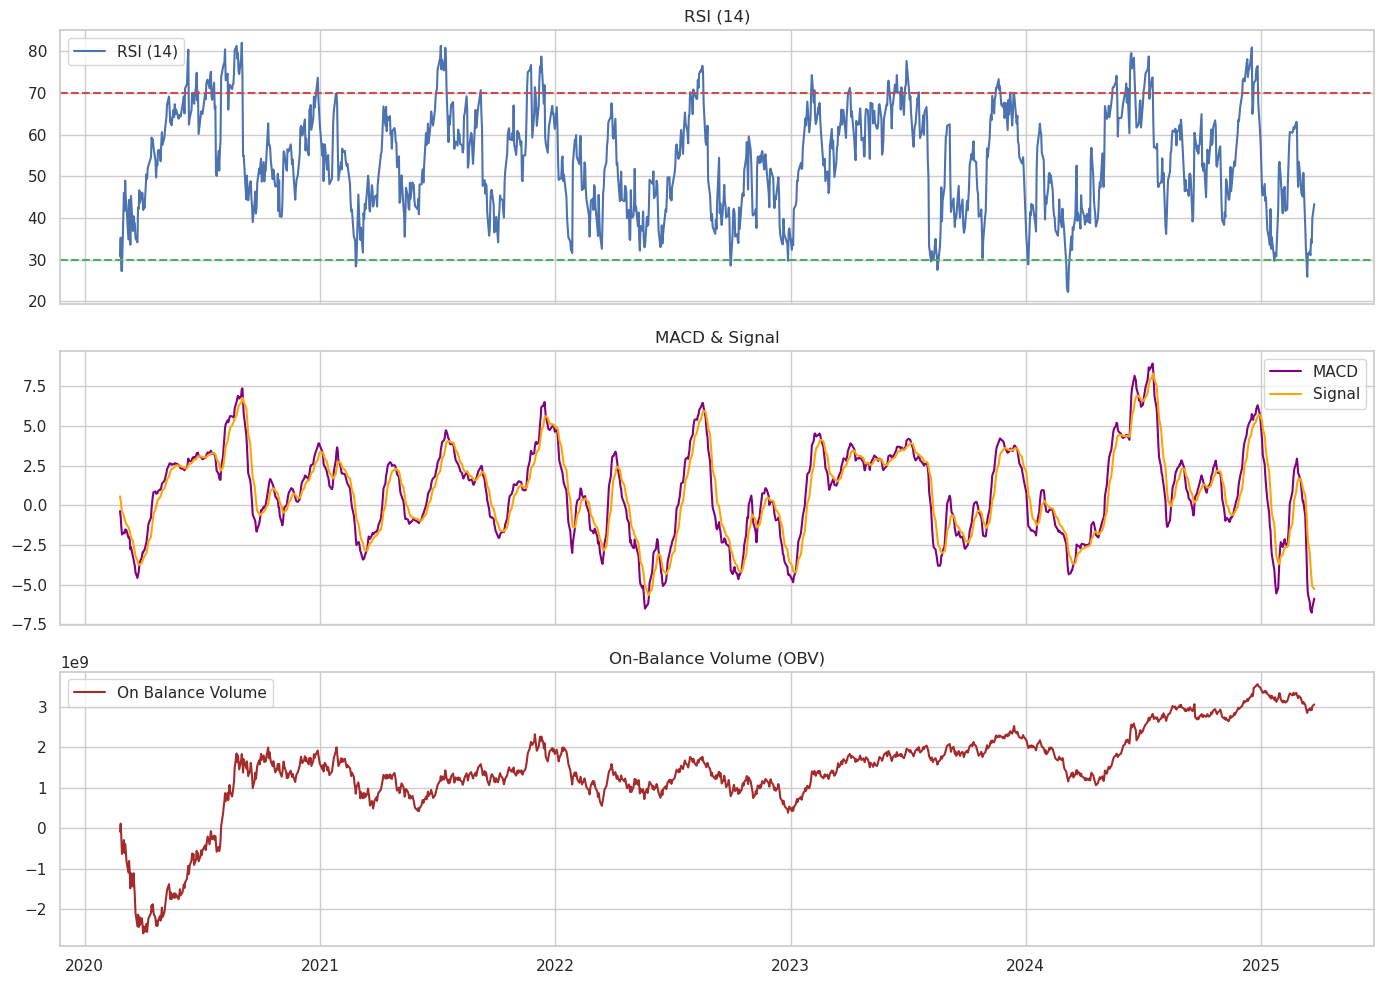

In [32]:
# Convert to numeric to ensure clean plotting
df["rsi_14"] = pd.to_numeric(df["rsi_14"], errors="coerce")
df["macd"] = pd.to_numeric(df["macd"], errors="coerce")
df["macd_signal"] = pd.to_numeric(df["macd_signal"], errors="coerce")
df["obv"] = pd.to_numeric(df["obv"], errors="coerce")

# Drop NaNs introduced during conversion
df.dropna(subset=["rsi_14", "macd", "macd_signal", "obv"], inplace=True)

# Replot
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# RSI
axes[0].plot(df["Date"].values, df["rsi_14"].values, label="RSI (14)")
axes[0].axhline(70, color='r', linestyle='--')
axes[0].axhline(30, color='g', linestyle='--')
axes[0].set_title("RSI (14)")

# MACD
axes[1].plot(df["Date"].values, df["macd"].values, label="MACD", color='purple')
axes[1].plot(df["Date"].values, df["macd_signal"].values, label="Signal", color='orange')
axes[1].set_title("MACD & Signal")

# OBV
axes[2].plot(df["Date"].values, df["obv"].values, label="On Balance Volume", color='brown')
axes[2].set_title("On-Balance Volume (OBV)")

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

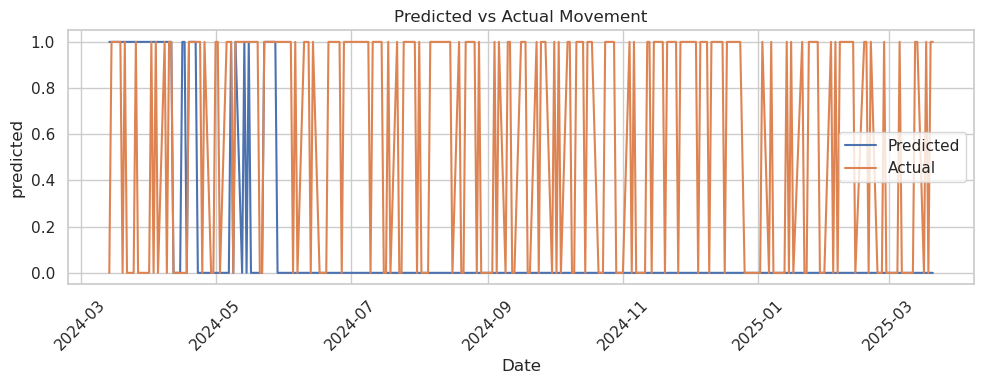

In [33]:
# Optional: If classification predictions were saved
pred_path = "../data/processed/AAPL_predictions.csv"
if os.path.exists(pred_path):
    pred_df = pd.read_csv(pred_path, parse_dates=["Date"])
    plt.figure(figsize=(10, 4))
    sns.lineplot(x="Date", y="predicted", data=pred_df, label="Predicted")
    sns.lineplot(x="Date", y="actual", data=pred_df, label="Actual")
    plt.title("Predicted vs Actual Movement")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No prediction file found — skipping model result plot.")

Plot saved to reports/twitter_sentiment_trend.png


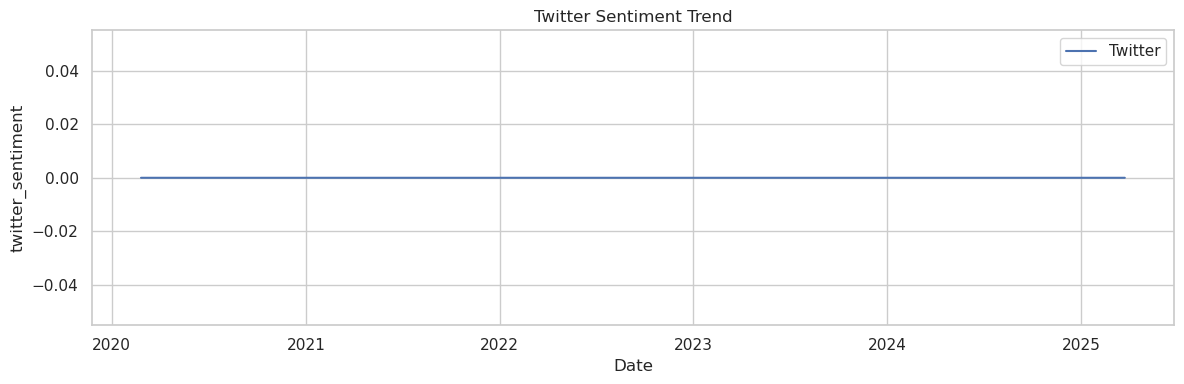

In [34]:
fig_path = "../reports"
os.makedirs(fig_path, exist_ok=True)

# Save one as example
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x="Date", y="twitter_sentiment", data=df, label="Twitter")
plt.title("Twitter Sentiment Trend")
plt.tight_layout()
fig.savefig(os.path.join(fig_path, "twitter_sentiment_trend.png"))
print("Plot saved to reports/twitter_sentiment_trend.png")